In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")

In [3]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
latest_date = pref["日付"].max().strftime("%Y-%m-%d")

In [5]:
all_jp = pref.groupby(["日付"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]

In [6]:
all_jp["weekday"] = all_jp["日付"].dt.weekday

In [7]:
last_date_str = all_jp["日付"].max().strftime("%Y/%m/%d")

## 移動平均

In [8]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp["死者数移動平均7"] = all_jp["各地の死者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,感染者数移動平均7,死者数移動平均7
501,2021-05-31,1785,80,0,3498.428571,93.428571
502,2021-06-01,2641,101,1,3319.571429,93.000000
503,2021-06-02,3029,113,2,3106.142857,92.571429
504,2021-06-03,2824,111,3,2920.142857,91.428571
505,2021-06-04,2586,86,4,2760.428571,90.142857


## 曜日別陽性者集計

In [9]:
all_jp_week_mean = all_jp.groupby(["weekday"]).mean()[["各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数"]].sort_index()
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp_week_mean = pd.merge(all_jp_week_mean, weekdays, left_on="weekday", right_index=True, how="left")
all_jp_week_mean


,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,曜日
weekday,,,
0,1021.291667,24.180556,月
1,1389.083333,32.000000,火
2,1618.347222,30.194444,水
3,1695.876712,28.369863,木
4,1642.520548,30.095890,金
5,1679.416667,23.791667,土
6,1388.861111,17.597222,日


In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


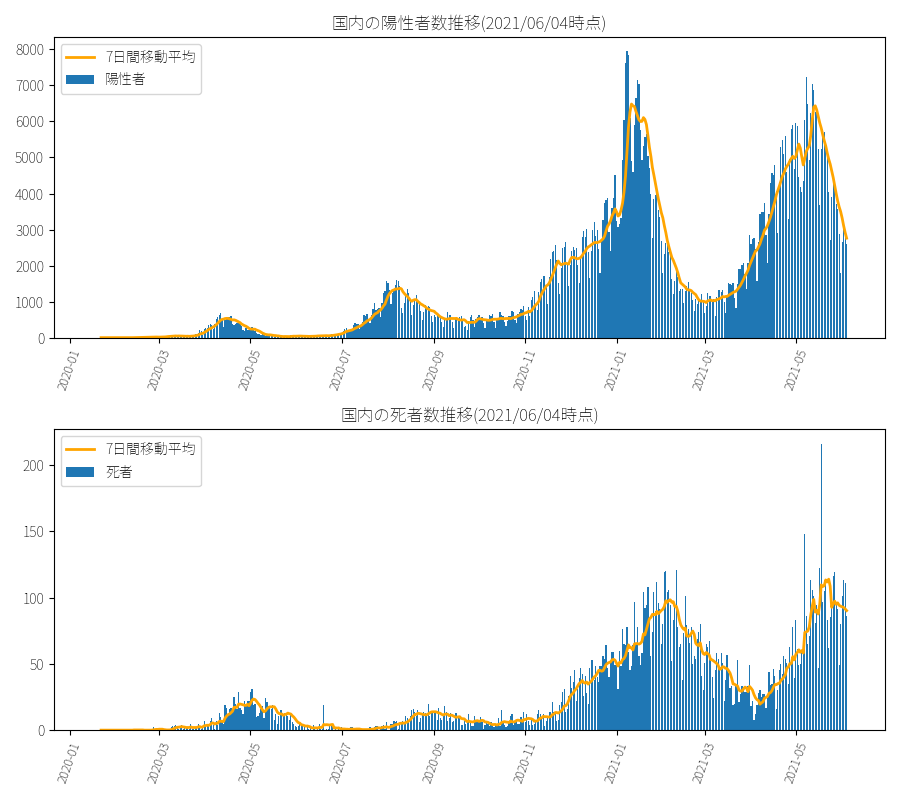

In [11]:
fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)
p_ax = ax[0]
p_ax.set_title("国内の陽性者数推移({}時点)".format(last_date_str))
p_ax.bar(all_jp["日付"],all_jp["各地の感染者数_1日ごとの発表数"],label="陽性者")
p_ax.plot_date(all_jp["日付"],all_jp["感染者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
p_ax.tick_params(axis="x",rotation=70, labelsize=9)
p_ax.legend()
d_ax = ax[1]
d_ax.set_title("国内の死者数推移({}時点)".format(last_date_str))
d_ax.bar(all_jp["日付"],all_jp["各地の死者数_1日ごとの発表数"],label="死者")
d_ax.plot_date(all_jp["日付"],all_jp["死者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
d_ax.tick_params(axis="x",rotation=70, labelsize=9)
d_ax.legend()

<IPython.core.display.Javascript object>


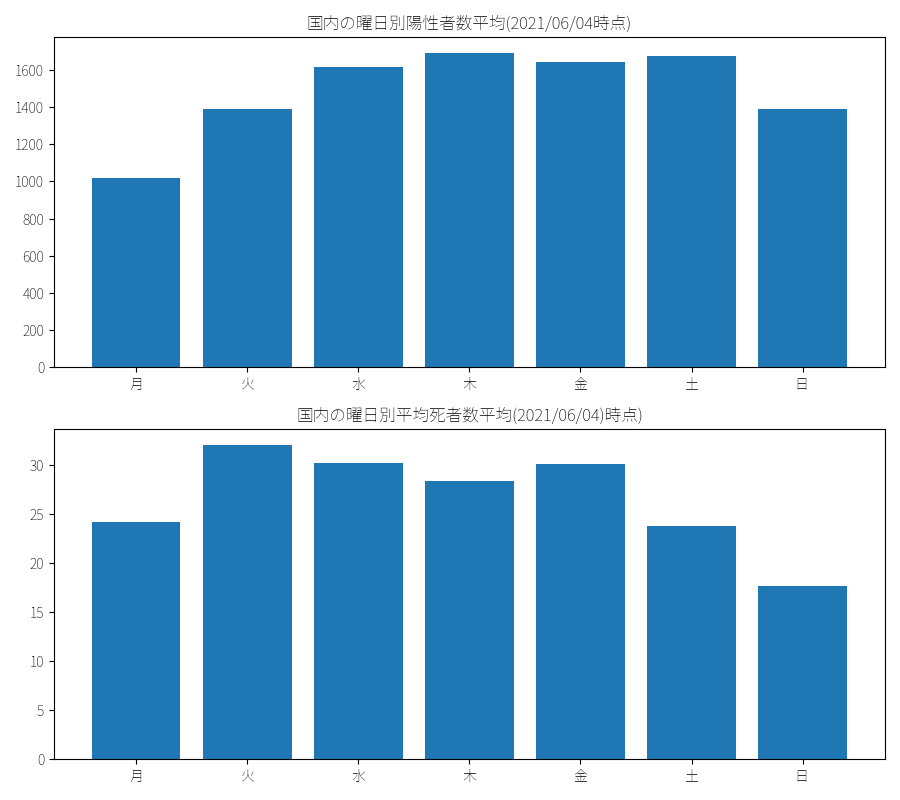

<BarContainer object of 7 artists>

In [12]:
fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)
wp_ax = ax[0]
wp_ax.set_title("国内の曜日別陽性者数平均({}時点)".format(last_date_str))
wp_ax.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の感染者数_1日ごとの発表数"])
wd_ax = ax[1]
wd_ax.set_title("国内の曜日別平均死者数平均({})時点)".format(last_date_str))
wd_ax.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の死者数_1日ごとの発表数"])

## 直近の推移

In [13]:
all_jp_latest = all_jp.loc[all_jp["日付"]>="2021-03-01"]
all_jp_latest.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,感染者数移動平均7,死者数移動平均7
501,2021-05-31,1785,80,0,3498.428571,93.428571
502,2021-06-01,2641,101,1,3319.571429,93.000000
503,2021-06-02,3029,113,2,3106.142857,92.571429
504,2021-06-03,2824,111,3,2920.142857,91.428571
505,2021-06-04,2586,86,4,2760.428571,90.142857


<IPython.core.display.Javascript object>


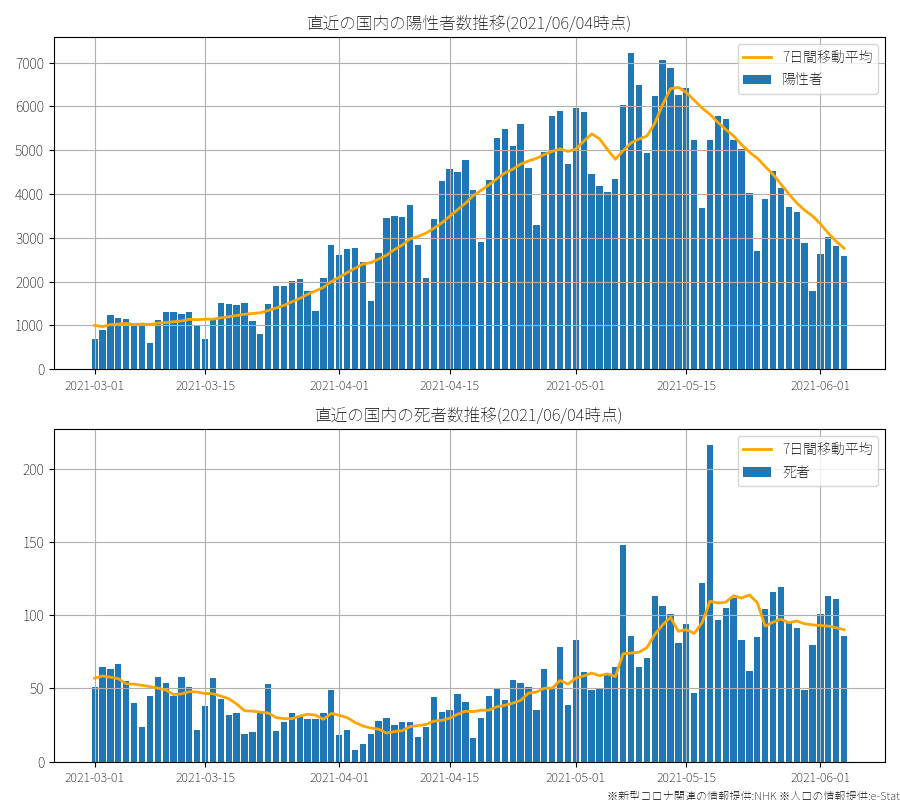

In [14]:
fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)

p_ax = ax[0]
p_ax.set_title("直近の国内の陽性者数推移({}時点)".format(last_date_str))
p_ax.bar(all_jp_latest["日付"],all_jp_latest["各地の感染者数_1日ごとの発表数"],label="陽性者")
p_ax.plot_date(all_jp_latest["日付"],all_jp_latest["感染者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
p_ax.tick_params(axis="x",labelsize=9)
p_ax.grid()
p_ax.legend()

d_ax = ax[1]
d_ax.set_title("直近の国内の死者数推移({}時点)".format(last_date_str))
d_ax.bar(all_jp_latest["日付"],all_jp_latest["各地の死者数_1日ごとの発表数"],label="死者")
d_ax.plot_date(all_jp_latest["日付"],all_jp_latest["死者数移動平均7"],label="7日間移動平均", fmt="-",lw=2.0, color="orange")
d_ax.tick_params(axis="x", labelsize=9)
d_ax.grid()
d_ax.legend()

# fig.text(all_jp_latest["日付"].max(),0,"※新型コロナ関連の情報提供:NHK ※人口の情報提供:e-Stat",fontsize=7,ha="right")
fig.text(1,0,"※新型コロナ関連の情報提供:NHK ※人口の情報提供:e-Stat",fontsize=8,ha="right")

fig.tight_layout()

In [15]:
fig.savefig("out/covid-domestic-transition.png")